In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from datetime import datetime

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test validate theo tỉ lệ 8:1:1**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train, test, validate
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 4s 67ms/step - loss: 0.0265 - val_loss: 6.6547e-04
Epoch 2/100
23/23 [==============================] - 1s 42ms/step - loss: 0.0029 - val_loss: 6.9913e-04
Epoch 3/100
23/23 [==============================] - 1s 45ms/step - loss: 7.4838e-04 - val_loss: 1.9253e-04
Epoch 4/100
23/23 [==============================] - 1s 44ms/step - loss: 5.6689e-04 - val_loss: 1.8544e-04
Epoch 5/100
23/23 [==============================] - 1s 48ms/step - loss: 5.2836e-04 - val_loss: 1.8281e-04
Epoch 6/100
23/23 [==============================] - 2s 68ms/step - loss: 5.0657e-04 - val_loss: 1.7083e-04
Epoch 7/100
23/23 [==============================] - 2s 71ms/step - loss: 4.8430e-04 - val_loss: 1.9647e-04
Epoch 8/100
23/23 [==============================] - 1s 42ms/step - loss: 4.8215e-04 - val_loss: 1.9101e-04
Epoch 9/100
23/23 [==============================] - 1s 42ms/step - loss: 4.5540e-04 - val_loss: 1.8507e-04
Epoch 10/100
23/23 [================

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_val=model.predict(X_val)

3/3 [==============================] - 0s 21ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_pred_val=scaler.inverse_transform(y_pred_val)

y_test = scaler.inverse_transform(y_test.reshape(-1,1))
y_val = scaler.inverse_transform(y_val.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_pred_val, y_val)
val_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
val_mape = mean_absolute_percentage_error(y_pred_val, y_val)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 364.6443995224722
Testing RMSE: 616.9450611222998
Testing MAPE: 0.01286842919796699
---------------------------
Validation MAE: 1722.9224393333327
Validation RMSE: 2259.160392596263
Validation MAPE: 0.027307163759729913


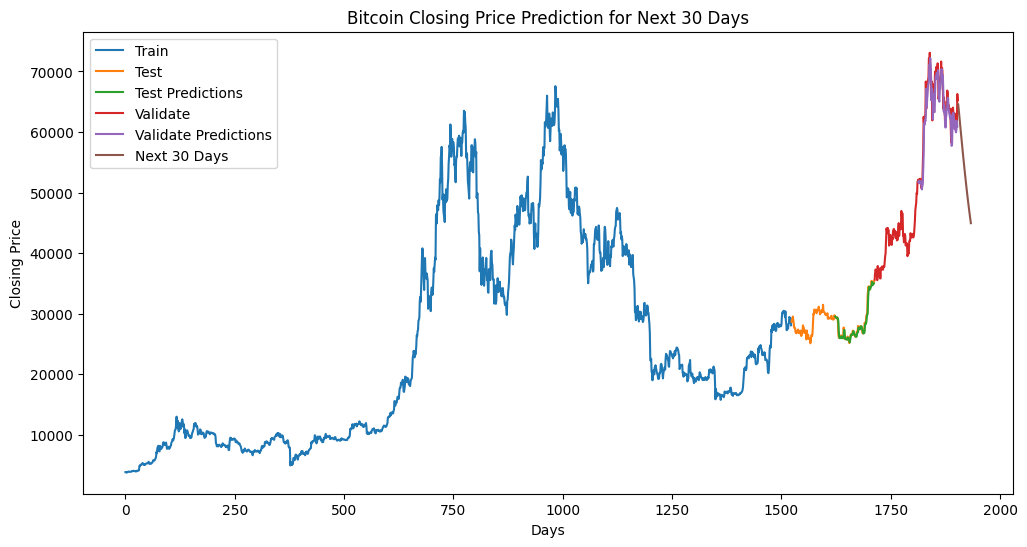

Predicted closing prices for the next 30 days:
[64547.703 63843.36  63088.496 62324.273 61559.36  60795.844 60035.305
 59278.645 58527.004 57781.125 57041.77  56309.53  55585.137 54869.12
 54162.23  53465.02  52778.    52101.55  51436.215 50782.137 50139.805
 49509.434 48892.09  48287.734 47696.83  47119.402 46555.49  46006.086
 45470.58  44949.28 ]


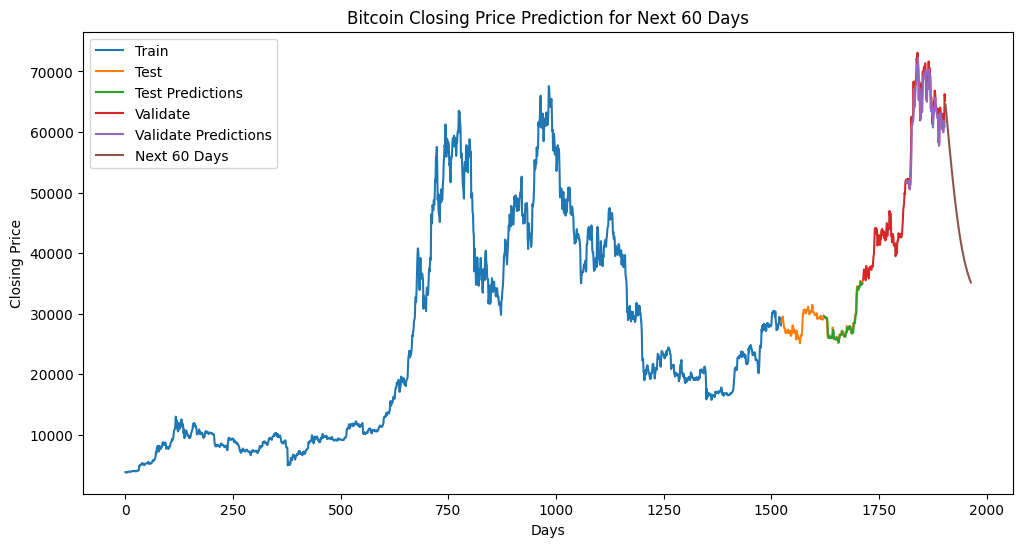

Predicted closing prices for the next 60 days:
[64547.703 63843.36  63088.496 62324.273 61559.36  60795.844 60035.305
 59278.645 58527.004 57781.125 57041.77  56309.53  55585.137 54869.12
 54162.23  53465.02  52778.    52101.55  51436.215 50782.137 50139.805
 49509.434 48892.09  48287.734 47696.83  47119.402 46555.49  46006.086
 45470.58  44949.28  44442.21  43949.46  43470.945 43006.457 42556.18
 42119.816 41697.438 41288.863 40893.93  40512.05  40143.234 39787.31
 39443.47  39111.848 38791.99  38483.453 38185.82  37898.773 37622.04
 37355.234 37097.945 36849.895 36610.676 36379.9   36157.336 35942.62
 35735.348 35535.16  35341.812 35154.945]


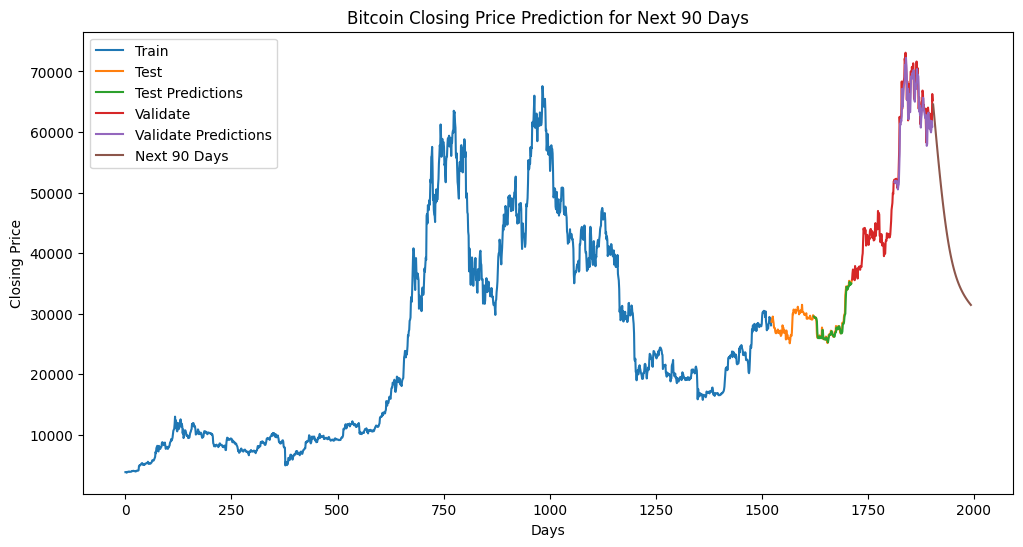

Predicted closing prices for the next 90 days:
[64547.703 63843.36  63088.496 62324.273 61559.36  60795.844 60035.305
 59278.645 58527.004 57781.125 57041.77  56309.53  55585.137 54869.12
 54162.23  53465.02  52778.    52101.55  51436.215 50782.137 50139.805
 49509.434 48892.09  48287.734 47696.83  47119.402 46555.49  46006.086
 45470.58  44949.28  44442.21  43949.46  43470.945 43006.457 42556.18
 42119.816 41697.438 41288.863 40893.93  40512.05  40143.234 39787.31
 39443.47  39111.848 38791.99  38483.453 38185.82  37898.773 37622.04
 37355.234 37097.945 36849.895 36610.676 36379.9   36157.336 35942.62
 35735.348 35535.16  35341.812 35154.945 34974.277 34799.508 34630.406
 34466.652 34308.03  34154.305 34005.24  33860.562 33720.098 33583.625
 33450.95  33321.875 33196.223 33073.83  32954.54  32838.2   32724.682
 32613.846 32505.555 32399.7   32296.162 32194.83  32095.6   31998.396
 31903.115 31809.668 31717.973 31627.965 31539.555 31452.688]


In [13]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    plt.plot(range(len(train_data) + len(test_data), len(train_data) + len(test_data) + len(val_data)), scaler.inverse_transform(val_data), label='Validate')
    plt.plot(range(len(train_data) + len(test_data) + time_step, len(train_data) + len(test_data) + time_step + len(y_pred_val)), y_pred_val, label='Validate Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test validate theo tỉ lệ 7:2:1**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [15]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
# 4. Chia train, test, validate
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [17]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [20]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 69ms/step - loss: 0.0189 - val_loss: 4.2069e-04
Epoch 2/100
20/20 [==============================] - 1s 44ms/step - loss: 0.0022 - val_loss: 5.2730e-04
Epoch 3/100
20/20 [==============================] - 1s 47ms/step - loss: 6.8078e-04 - val_loss: 2.1377e-04
Epoch 4/100
20/20 [==============================] - 2s 117ms/step - loss: 5.8248e-04 - val_loss: 1.5790e-04
Epoch 5/100
20/20 [==============================] - 1s 60ms/step - loss: 5.1601e-04 - val_loss: 1.4482e-04
Epoch 6/100
20/20 [==============================] - 2s 97ms/step - loss: 4.9837e-04 - val_loss: 1.5098e-04
Epoch 7/100
20/20 [==============================] - 3s 137ms/step - loss: 4.8009e-04 - val_loss: 1.3685e-04
Epoch 8/100
20/20 [==============================] - 2s 102ms/step - loss: 4.6823e-04 - val_loss: 1.3232e-04
Epoch 9/100
20/20 [==============================] - 2s 99ms/step - loss: 4.5473e-04 - val_loss: 1.3000e-04
Epoch 10/100
20/20 [=============

In [22]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_val=model.predict(X_val)

3/3 [==============================] - 0s 11ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_pred_val=scaler.inverse_transform(y_pred_val)

y_test = scaler.inverse_transform(y_test.reshape(-1,1))
y_val = scaler.inverse_transform(y_val.reshape(-1,1))

In [24]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_pred_val, y_val)
val_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
val_mape = mean_absolute_percentage_error(y_pred_val, y_val)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 819.3677892069891
Testing RMSE: 933.1316281672875
Testing MAPE: 0.029236996515644965
---------------------------
Validation MAE: 1663.678098736263
Validation RMSE: 2172.8628093454136
Validation MAPE: 0.025706356217057597


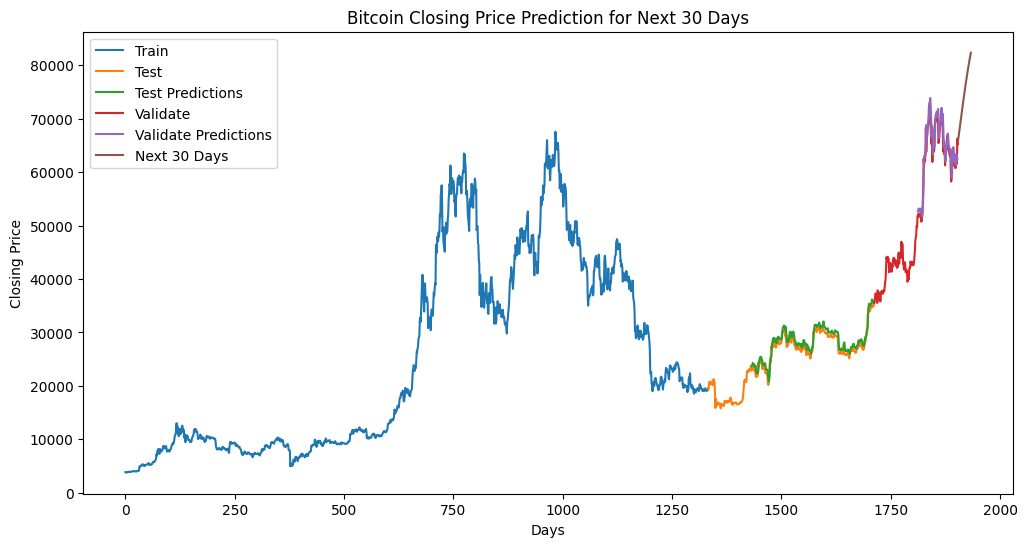

Predicted closing prices for the next 30 days:
[66100.445 66696.08  67319.805 67942.21  68565.99  69190.266 69814.17
 70436.85  71057.555 71675.44  72289.69  72899.47  73503.99  74102.45
 74694.195 75278.48  75854.63  76421.97  76979.875 77527.625 78064.71
 78590.47  79104.81  79607.12  80097.12  80574.305 81038.22  81489.09
 81926.24  82349.56 ]


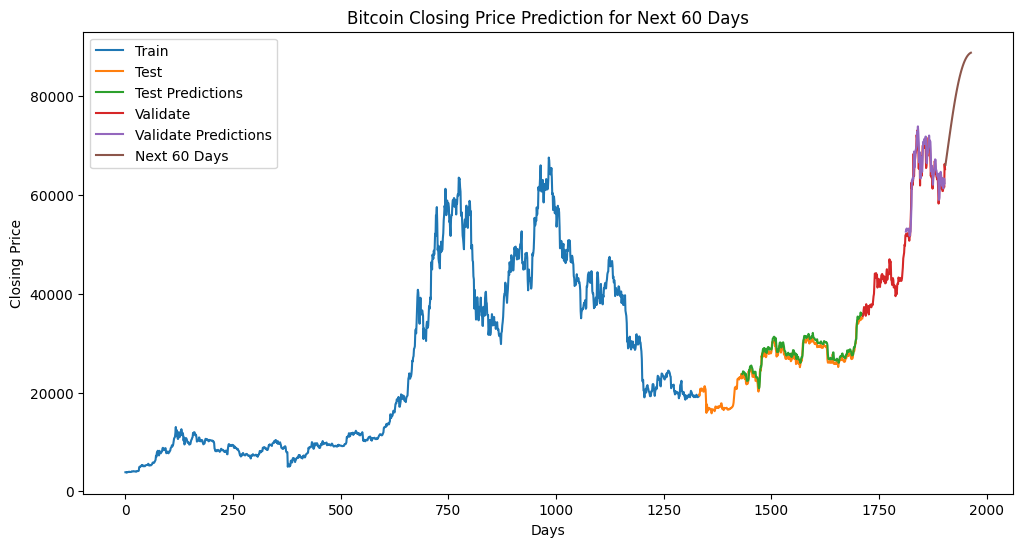

Predicted closing prices for the next 60 days:
[66100.445 66696.08  67319.805 67942.21  68565.99  69190.266 69814.17
 70436.85  71057.555 71675.44  72289.69  72899.47  73503.99  74102.45
 74694.195 75278.48  75854.63  76421.97  76979.875 77527.625 78064.71
 78590.47  79104.81  79607.12  80097.12  80574.305 81038.22  81489.09
 81926.24  82349.56  82758.87  83154.03  83534.93  83901.36  84253.48
 84591.13  84914.58  85223.93  85519.35  85800.53  86067.95  86321.98
 86562.01  86788.88  87002.69  87203.484 87391.266 87566.35  87729.19
 87880.016 88019.016 88146.64  88263.1   88368.59  88463.766 88549.11
 88624.47  88690.055 88746.46  88793.81 ]


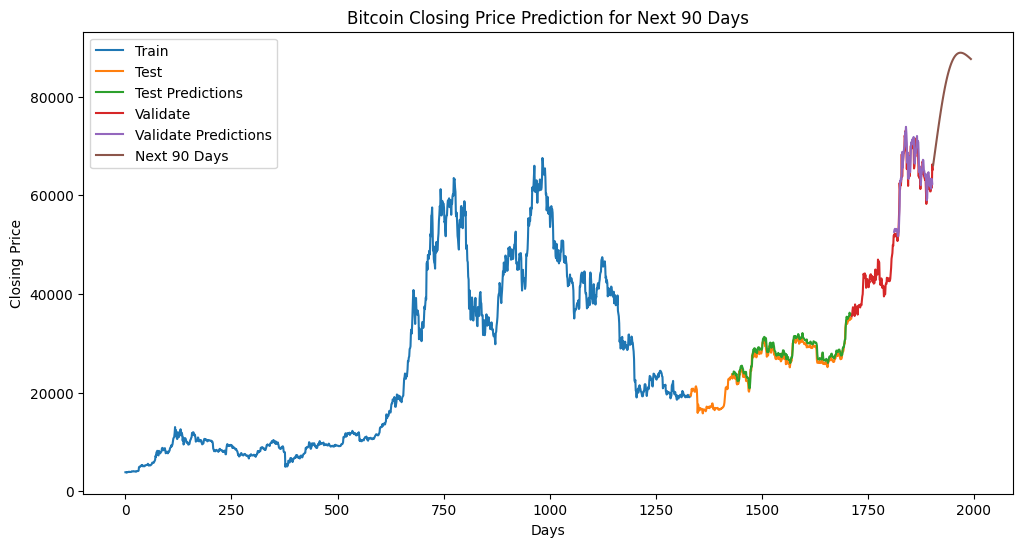

Predicted closing prices for the next 90 days:
[66100.445 66696.08  67319.805 67942.21  68565.99  69190.266 69814.17
 70436.85  71057.555 71675.44  72289.69  72899.47  73503.99  74102.45
 74694.195 75278.48  75854.63  76421.97  76979.875 77527.625 78064.71
 78590.47  79104.81  79607.12  80097.12  80574.305 81038.22  81489.09
 81926.24  82349.56  82758.87  83154.03  83534.93  83901.36  84253.48
 84591.13  84914.58  85223.93  85519.35  85800.53  86067.95  86321.98
 86562.01  86788.88  87002.69  87203.484 87391.266 87566.35  87729.19
 87880.016 88019.016 88146.64  88263.1   88368.59  88463.766 88549.11
 88624.47  88690.055 88746.46  88793.81  88832.445 88862.586 88884.94
 88899.45  88906.72  88907.32  88901.586 88889.37  88871.445 88847.86
 88819.2   88785.195 88746.414 88702.984 88655.33  88603.5   88548.14
 88489.66  88428.08  88363.8   88297.04  88228.05  88157.08  88085.
 88011.77  87937.055 87860.69  87783.41  87705.52  87627.46 ]


In [25]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    plt.plot(range(len(train_data) + len(test_data), len(train_data) + len(test_data) + len(val_data)), scaler.inverse_transform(val_data), label='Validate')
    plt.plot(range(len(train_data) + len(test_data) + time_step, len(train_data) + len(test_data) + time_step + len(y_pred_val)), y_pred_val, label='Validate Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test validate theo tỉ lệ 6:2:2**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [27]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
# 4. Chia train, test, validate
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [29]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [32]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 5s 153ms/step - loss: 0.0768 - val_loss: 0.0173
Epoch 2/100
17/17 [==============================] - 3s 159ms/step - loss: 0.0142 - val_loss: 6.8802e-04
Epoch 3/100
17/17 [==============================] - 2s 142ms/step - loss: 0.0036 - val_loss: 5.7101e-04
Epoch 4/100
17/17 [==============================] - 2s 137ms/step - loss: 0.0011 - val_loss: 3.2379e-04
Epoch 5/100
17/17 [==============================] - 2s 134ms/step - loss: 8.7214e-04 - val_loss: 2.7676e-04
Epoch 6/100
17/17 [==============================] - 2s 138ms/step - loss: 8.0884e-04 - val_loss: 2.0038e-04
Epoch 7/100
17/17 [==============================] - 2s 122ms/step - loss: 7.6617e-04 - val_loss: 1.9481e-04
Epoch 8/100
17/17 [==============================] - 1s 56ms/step - loss: 7.3263e-04 - val_loss: 2.0101e-04
Epoch 9/100
17/17 [==============================] - 1s 45ms/step - loss: 6.9843e-04 - val_loss: 1.8726e-04
Epoch 10/100
17/17 [=====================

In [34]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_val=model.predict(X_val)

9/9 [==============================] - 0s 10ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_pred_val=scaler.inverse_transform(y_pred_val)

y_test = scaler.inverse_transform(y_test.reshape(-1,1))
y_val = scaler.inverse_transform(y_val.reshape(-1,1))

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_pred_val, y_val)
val_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
val_mape = mean_absolute_percentage_error(y_pred_val, y_val)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 613.2646027150533
Testing RMSE: 811.1096625517398
Testing MAPE: 0.027856190264530924
---------------------------
Validation MAE: 1020.4291451223307
Validation RMSE: 1444.422672118936
Validation MAPE: 0.022420648636429535


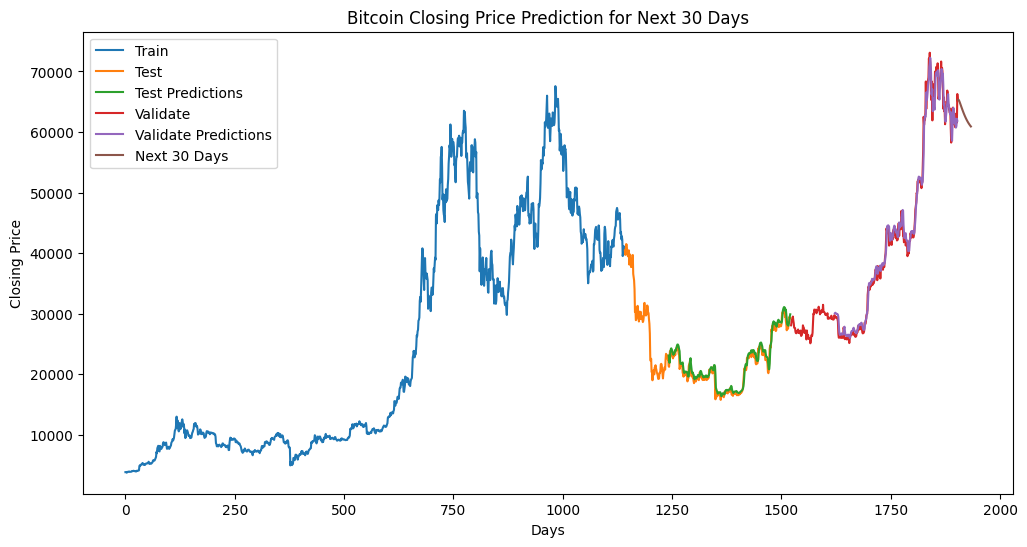

Predicted closing prices for the next 30 days:
[65306.34  65311.71  65185.047 65007.598 64811.027 64607.6   64401.98
 64196.504 63992.617 63791.42  63593.824 63400.574 63212.207 63029.234
 62851.926 62680.59  62515.38  62356.41  62203.754 62057.38  61917.258
 61783.215 61655.09  61532.793 61416.156 61305.047 61199.22  61098.445
 61002.656 60911.594]


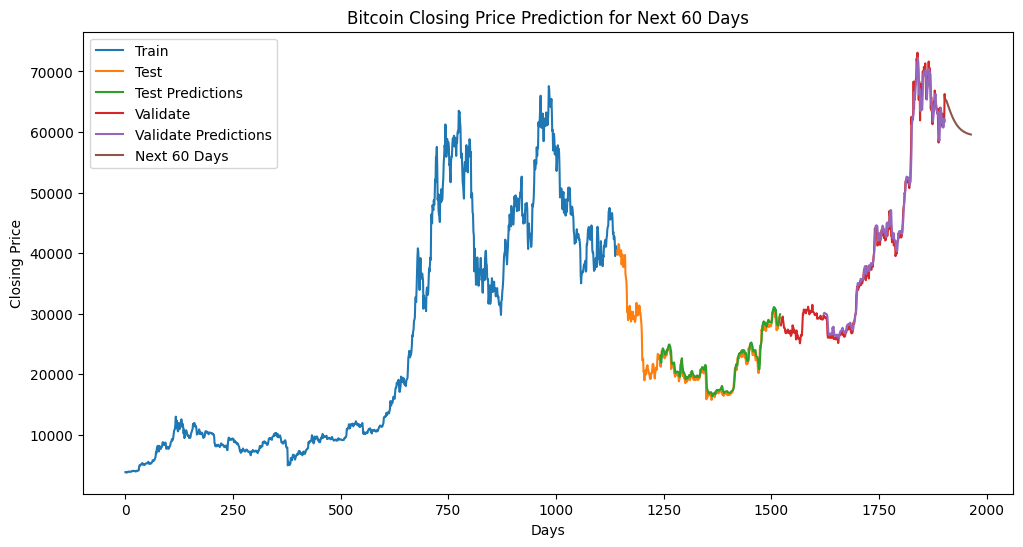

Predicted closing prices for the next 60 days:
[65306.34  65311.71  65185.047 65007.598 64811.027 64607.6   64401.98
 64196.504 63992.617 63791.42  63593.824 63400.574 63212.207 63029.234
 62851.926 62680.59  62515.38  62356.41  62203.754 62057.38  61917.258
 61783.215 61655.09  61532.793 61416.156 61305.047 61199.22  61098.445
 61002.656 60911.594 60825.066 60742.887 60664.9   60590.89  60520.652
 60454.01  60390.773 60330.773 60273.887 60220.035 60168.953 60120.566
 60074.84  60031.48  59990.473 59951.723 59915.094 59880.477 59847.72
 59816.746 59787.45  59759.742 59733.53  59708.746 59685.258 59663.04
 59642.08  59622.277 59603.57  59585.895]


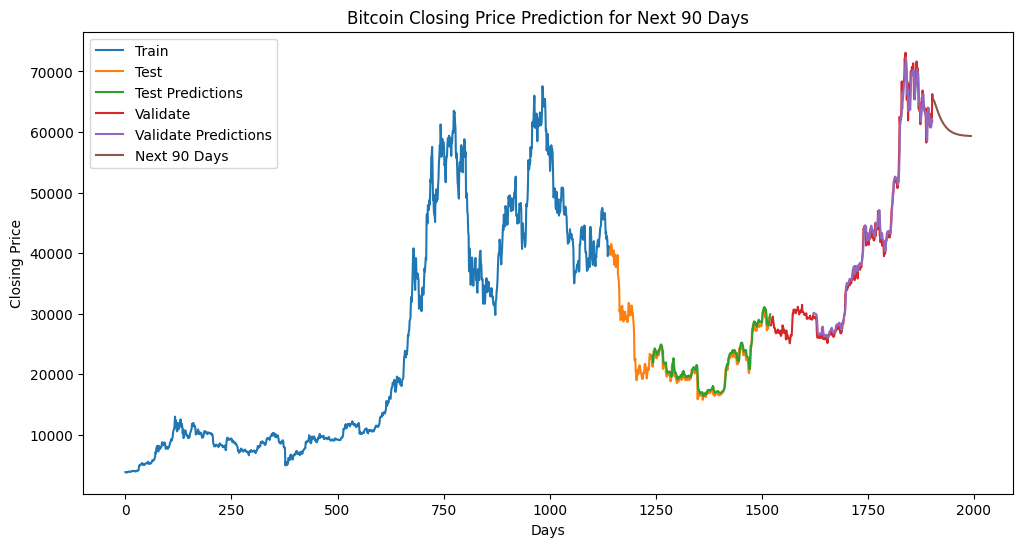

Predicted closing prices for the next 90 days:
[65306.34  65311.71  65185.047 65007.598 64811.027 64607.6   64401.98
 64196.504 63992.617 63791.42  63593.824 63400.574 63212.207 63029.234
 62851.926 62680.59  62515.38  62356.41  62203.754 62057.38  61917.258
 61783.215 61655.09  61532.793 61416.156 61305.047 61199.22  61098.445
 61002.656 60911.594 60825.066 60742.887 60664.9   60590.89  60520.652
 60454.01  60390.773 60330.773 60273.887 60220.035 60168.953 60120.566
 60074.84  60031.48  59990.473 59951.723 59915.094 59880.477 59847.72
 59816.746 59787.45  59759.742 59733.53  59708.746 59685.258 59663.04
 59642.08  59622.277 59603.57  59585.895 59569.203 59553.434 59538.508
 59524.402 59511.043 59498.387 59486.406 59475.11  59464.414 59454.332
 59444.79  59435.836 59427.387 59419.434 59411.93  59404.848 59398.16
 59391.832 59385.87  59380.24  59374.93  59369.91  59365.164 59360.656
 59356.44  59352.496 59348.812 59345.34  59342.066 59338.97 ]


In [37]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    plt.plot(range(len(train_data) + len(test_data), len(train_data) + len(test_data) + len(val_data)), scaler.inverse_transform(val_data), label='Validate')
    plt.plot(range(len(train_data) + len(test_data) + time_step, len(train_data) + len(test_data) + time_step + len(y_pred_val)), y_pred_val, label='Validate Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())